In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import scipy as sp
import numpy as np
import warnings
import pySingleCellNet as pySCN

warnings.filterwarnings('ignore')
sc.settings.set_figure_params(dpi=80)

C:\Users\yeaji\anaconda3\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\yeaji\anaconda3\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\yeaji\anaconda3\Lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' keywo

In [2]:
e125 = sc.read("C:/Users/yeaji/OneDrive - Johns Hopkins/PC.project/1. Cartilage devp/data/scRNA/Qin_data/adJointDev_ALL_032322v2.h5ad")

In [3]:
e125.obs

,timepoint,ann1,level1,level2,level3,topLevel,batch
qb_E12-5_gdf:AAACCTGAGGCGTACAx-0-0-0,e12.5,joint,SC1,SC1_A,SC1_A1,GLE,0
qb_E12-5_gdf:AAACCTGCACTGCCAGx-0-0-0,e12.5,cycling,SC1,SC1_A,SC1_A4,GLE,0
qb_E12-5_gdf:AAACCTGGTGAGTGACx-0-0-0,e12.5,joint,SC1,SC1_A,SC1_A1,GLE,0
qb_E12-5_gdf:AAACCTGGTTGCCTCTx-0-0-0,e12.5,cycling,SC1,SC1_A,SC1_A4,GLE,0
qb_E12-5_gdf:AAACCTGTCGAGAACGx-0-0-0,e12.5,joint,SC1,SC1_B,SC1_B4,GLE,0
...,...,...,...,...,...,...,...
qb_E17-5_gdf:TTGCGTCGTGTGGTTTx-1-1,e17.5,NaN,2,2,2,non-GLE,1
qb_E17-5_gdf:TTTGTCACATCCCACTx-1-1,e17.5,NaN,3,3,3,non-GLE,1
qb_E17-5_gdf:TTGGCAATCACAACGTx-1-1,e17.5,NaN,4,4,4,non-GLE,1
qb_E17-5_gdf:TTTGGTTTCGACGGAAx-1-1,e17.5,NaN,2,2,2,non-GLE,1


In [4]:
e125.obs["timepoint"]

qb_E12-5_gdf:AAACCTGAGGCGTACAx-0-0-0    e12.5
qb_E12-5_gdf:AAACCTGCACTGCCAGx-0-0-0    e12.5
qb_E12-5_gdf:AAACCTGGTGAGTGACx-0-0-0    e12.5
qb_E12-5_gdf:AAACCTGGTTGCCTCTx-0-0-0    e12.5
qb_E12-5_gdf:AAACCTGTCGAGAACGx-0-0-0    e12.5
                                        ...  
qb_E17-5_gdf:TTGCGTCGTGTGGTTTx-1-1      e17.5
qb_E17-5_gdf:TTTGTCACATCCCACTx-1-1      e17.5
qb_E17-5_gdf:TTGGCAATCACAACGTx-1-1      e17.5
qb_E17-5_gdf:TTTGGTTTCGACGGAAx-1-1      e17.5
qb_E17-5_gdf:TTGGCAAAGTGGGCTAx-1-1      e17.5
Name: timepoint, Length: 12096, dtype: category
Categories (5, object): ['e12.5', 'e13.5', 'e14.5', 'e15.5', 'e17.5']

In [5]:
e125.obs["timepoint"]=="e12.5"

qb_E12-5_gdf:AAACCTGAGGCGTACAx-0-0-0     True
qb_E12-5_gdf:AAACCTGCACTGCCAGx-0-0-0     True
qb_E12-5_gdf:AAACCTGGTGAGTGACx-0-0-0     True
qb_E12-5_gdf:AAACCTGGTTGCCTCTx-0-0-0     True
qb_E12-5_gdf:AAACCTGTCGAGAACGx-0-0-0     True
                                        ...  
qb_E17-5_gdf:TTGCGTCGTGTGGTTTx-1-1      False
qb_E17-5_gdf:TTTGTCACATCCCACTx-1-1      False
qb_E17-5_gdf:TTGGCAATCACAACGTx-1-1      False
qb_E17-5_gdf:TTTGGTTTCGACGGAAx-1-1      False
qb_E17-5_gdf:TTGGCAAAGTGGGCTAx-1-1      False
Name: timepoint, Length: 12096, dtype: bool

In [6]:
indicator = e125.obs["timepoint"]=="e12.5"
e125 = e125[indicator,:]

In [7]:
e125.obs

,timepoint,ann1,level1,level2,level3,topLevel,batch
qb_E12-5_gdf:AAACCTGAGGCGTACAx-0-0-0,e12.5,joint,SC1,SC1_A,SC1_A1,GLE,0
qb_E12-5_gdf:AAACCTGCACTGCCAGx-0-0-0,e12.5,cycling,SC1,SC1_A,SC1_A4,GLE,0
qb_E12-5_gdf:AAACCTGGTGAGTGACx-0-0-0,e12.5,joint,SC1,SC1_A,SC1_A1,GLE,0
qb_E12-5_gdf:AAACCTGGTTGCCTCTx-0-0-0,e12.5,cycling,SC1,SC1_A,SC1_A4,GLE,0
qb_E12-5_gdf:AAACCTGTCGAGAACGx-0-0-0,e12.5,joint,SC1,SC1_B,SC1_B4,GLE,0
...,...,...,...,...,...,...,...
qb_E12-5_gdf:TTGCGTCAGTCTCCTCx-0-0-1,e12.5,myocyte,myocyte,myocyte,myocyte,non-GLE,1
qb_E12-5_gdf:TTGCGTCCAAAGGTGCx-0-0-1,e12.5,myocyte,myocyte,myocyte,myocyte,non-GLE,1
qb_E12-5_gdf:TTGGCAAAGTAGCGGTx-0-0-1,e12.5,myocyte,myocyte,myocyte,myocyte,non-GLE,1
qb_E12-5_gdf:TTTCCTCGTAAACCTCx-0-0-1,e12.5,endothelial,endothelial,endothelial,endothelial,non-GLE,1


In [8]:
e125.write_h5ad("C:/Users/yeaji/OneDrive - Johns Hopkins/PC.project/1. Cartilage devp/data/scRNA/Qin_data/Analysis/e12.5/e125_raw.h5ad")

In [9]:
e125

View of AnnData object with n_obs × n_vars = 2906 × 31065
    obs: 'timepoint', 'ann1', 'level1', 'level2', 'level3', 'topLevel', 'batch'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [10]:
e125.obs

,timepoint,ann1,level1,level2,level3,topLevel,batch
qb_E12-5_gdf:AAACCTGAGGCGTACAx-0-0-0,e12.5,joint,SC1,SC1_A,SC1_A1,GLE,0
qb_E12-5_gdf:AAACCTGCACTGCCAGx-0-0-0,e12.5,cycling,SC1,SC1_A,SC1_A4,GLE,0
qb_E12-5_gdf:AAACCTGGTGAGTGACx-0-0-0,e12.5,joint,SC1,SC1_A,SC1_A1,GLE,0
qb_E12-5_gdf:AAACCTGGTTGCCTCTx-0-0-0,e12.5,cycling,SC1,SC1_A,SC1_A4,GLE,0
qb_E12-5_gdf:AAACCTGTCGAGAACGx-0-0-0,e12.5,joint,SC1,SC1_B,SC1_B4,GLE,0
...,...,...,...,...,...,...,...
qb_E12-5_gdf:TTGCGTCAGTCTCCTCx-0-0-1,e12.5,myocyte,myocyte,myocyte,myocyte,non-GLE,1
qb_E12-5_gdf:TTGCGTCCAAAGGTGCx-0-0-1,e12.5,myocyte,myocyte,myocyte,myocyte,non-GLE,1
qb_E12-5_gdf:TTGGCAAAGTAGCGGTx-0-0-1,e12.5,myocyte,myocyte,myocyte,myocyte,non-GLE,1
qb_E12-5_gdf:TTTCCTCGTAAACCTCx-0-0-1,e12.5,endothelial,endothelial,endothelial,endothelial,non-GLE,1


In [11]:
e125.obs_names

Index(['qb_E12-5_gdf:AAACCTGAGGCGTACAx-0-0-0',
       'qb_E12-5_gdf:AAACCTGCACTGCCAGx-0-0-0',
       'qb_E12-5_gdf:AAACCTGGTGAGTGACx-0-0-0',
       'qb_E12-5_gdf:AAACCTGGTTGCCTCTx-0-0-0',
       'qb_E12-5_gdf:AAACCTGTCGAGAACGx-0-0-0',
       'qb_E12-5_gdf:AAACCTGTCGATCCCTx-0-0-0',
       'qb_E12-5_gdf:AAACCTGTCGTAGATCx-0-0-0',
       'qb_E12-5_gdf:AAACGGGAGAATGTTGx-0-0-0',
       'qb_E12-5_gdf:AAACGGGCAAGTCTGTx-0-0-0',
       'qb_E12-5_gdf:AAACGGGCACAAGACGx-0-0-0',
       ...
       'qb_E12-5_gdf:TTATGCTAGATCGGGTx-0-0-1',
       'qb_E12-5_gdf:TTCGAAGCATGGGACAx-0-0-1',
       'qb_E12-5_gdf:TTCGGTCCATAGACTCx-0-0-1',
       'qb_E12-5_gdf:TTCTACAGTTACAGAAx-0-0-1',
       'qb_E12-5_gdf:TTCTCAACAGGACCCTx-0-0-1',
       'qb_E12-5_gdf:TTGCGTCAGTCTCCTCx-0-0-1',
       'qb_E12-5_gdf:TTGCGTCCAAAGGTGCx-0-0-1',
       'qb_E12-5_gdf:TTGGCAAAGTAGCGGTx-0-0-1',
       'qb_E12-5_gdf:TTTCCTCGTAAACCTCx-0-0-1',
       'qb_E12-5_gdf:TTTCCTCGTCTAGAGGx-0-0-1'],
      dtype='object', length=2906)

In [12]:
e125.var

,Accession,Chromosome,End,Start,Strand
Xkr4,ENSMUSG00000051951,1,3671498,3205901,-
Gm37381,ENSMUSG00000102343,1,3986215,3905739,-
Rp1,ENSMUSG00000025900,1,4409241,3999557,-
Sox17,ENSMUSG00000025902,1,4497354,4490931,-
Gm37323,ENSMUSG00000104328,1,4586252,4583129,-
...,...,...,...,...,...
selection_hygromycinB,selection_hygromycinB,selection_hygromycinB,1025,1,+
selection_kanamycin,selection_kanamycin,selection_kanamycin,794,1,+
selection_neomycin,selection_neomycin,selection_neomycin,815,1,+
selection_puromycin,selection_puromycin,selection_puromycin,599,1,+


# QC

In [13]:
#checks if the gene name (var) starts with 'mt' or 'ribo' via string methods
e125.var['mt']= e125.var_names.str.startswith(("mt-"))
print(sum(e125.var['mt']))

13


In [14]:
e125.var['ribo'] = e125.var_names.str.startswith(("Rps","Rpl"))
print(sum(e125.var['ribo']))

105


In [15]:
e125.var

,Accession,Chromosome,End,Start,Strand,mt,ribo
Xkr4,ENSMUSG00000051951,1,3671498,3205901,-,False,False
Gm37381,ENSMUSG00000102343,1,3986215,3905739,-,False,False
Rp1,ENSMUSG00000025900,1,4409241,3999557,-,False,False
Sox17,ENSMUSG00000025902,1,4497354,4490931,-,False,False
Gm37323,ENSMUSG00000104328,1,4586252,4583129,-,False,False
...,...,...,...,...,...,...,...
selection_hygromycinB,selection_hygromycinB,selection_hygromycinB,1025,1,+,False,False
selection_kanamycin,selection_kanamycin,selection_kanamycin,794,1,+,False,False
selection_neomycin,selection_neomycin,selection_neomycin,815,1,+,False,False
selection_puromycin,selection_puromycin,selection_puromycin,599,1,+,False,False


In [16]:
sc.pp.calculate_qc_metrics(e125, qc_vars=['ribo', 'mt'], percent_top=None, log1p=False, inplace=True)

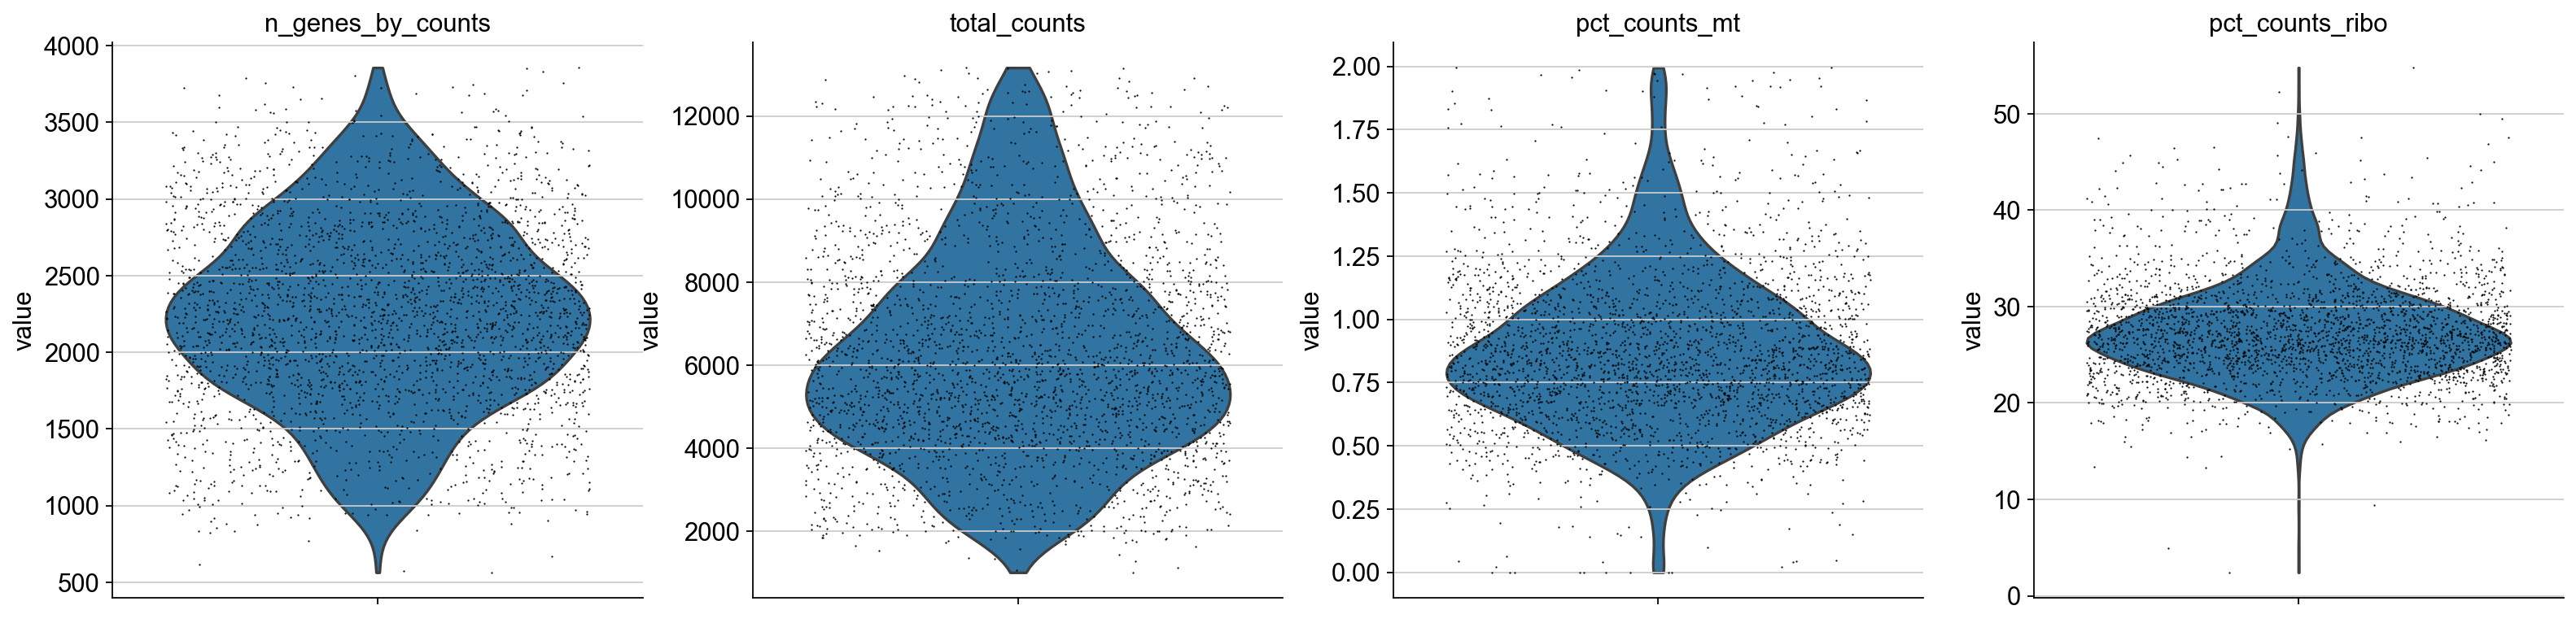

In [17]:
axs = sc.pl.violin(e125, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'],jitter=0.4, multi_panel=True)

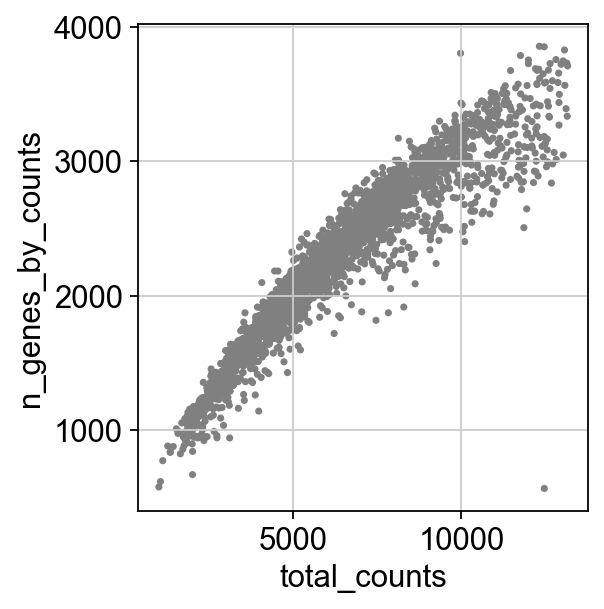

In [18]:
sc.pl.scatter(e125, x='total_counts', y='n_genes_by_counts')

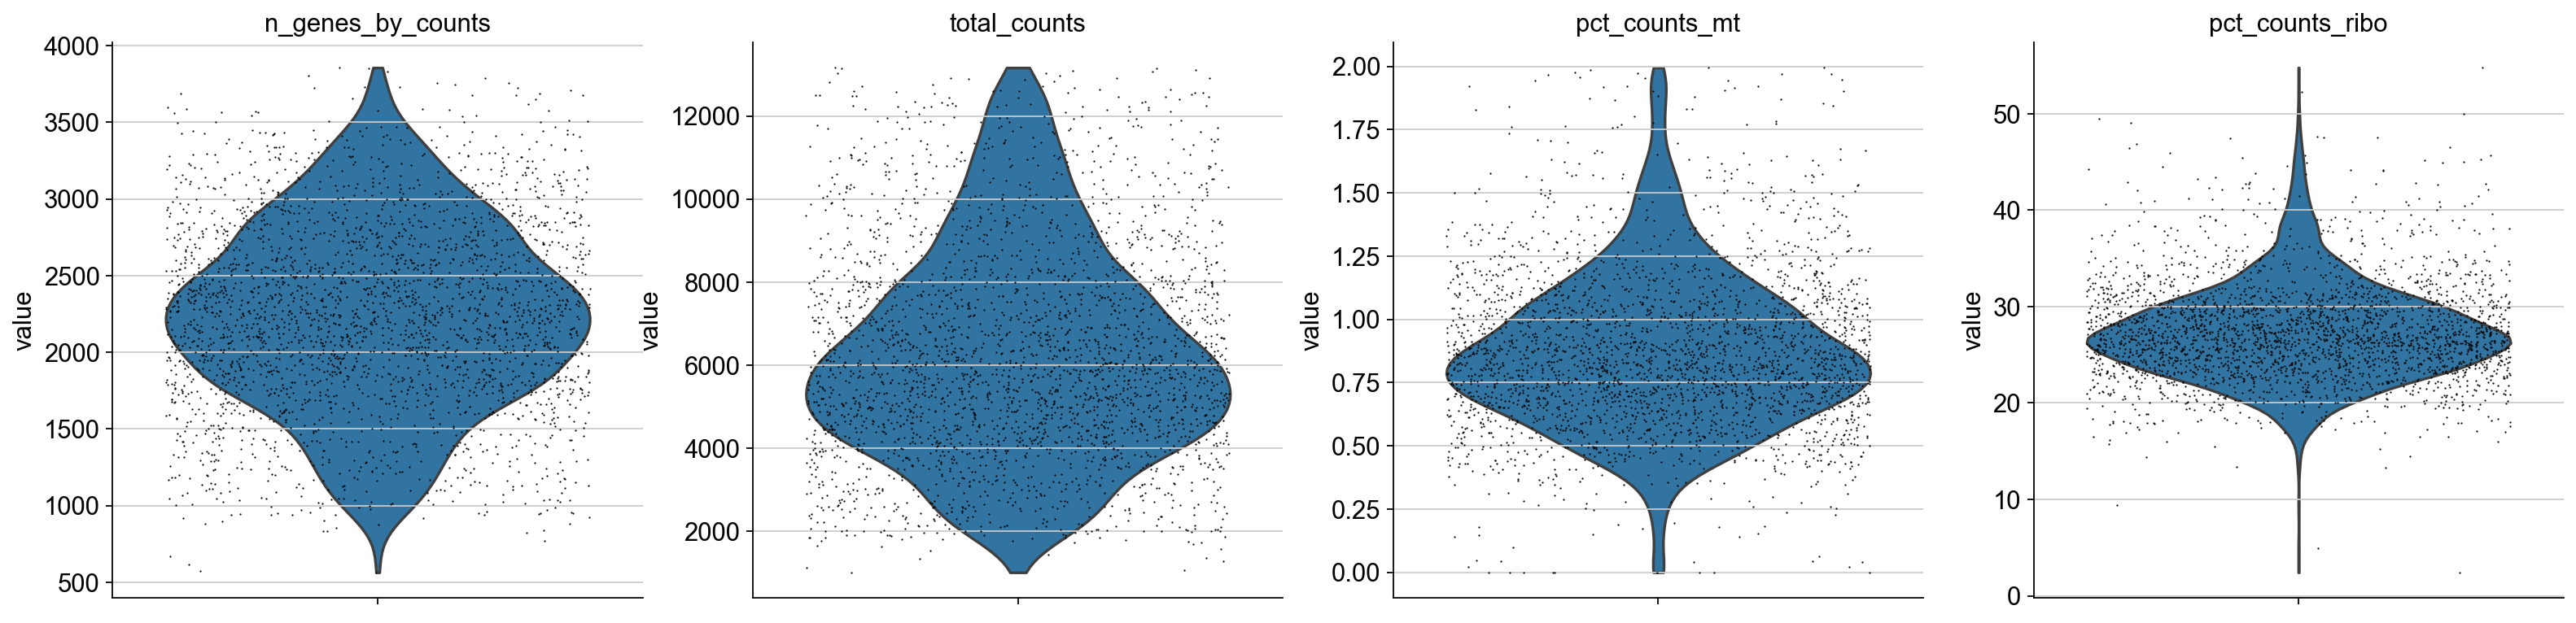

In [19]:
e125= e125[e125.obs['total_counts'] < 20000, :]
e125 = e125[e125.obs['pct_counts_mt'] < 2.5, :]
# filter for percent ribo > 0.05
e125 = e125[e125.obs['pct_counts_ribo'] < 60, :]
axs = sc.pl.violin(e125, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'],jitter=0.4, multi_panel=True)

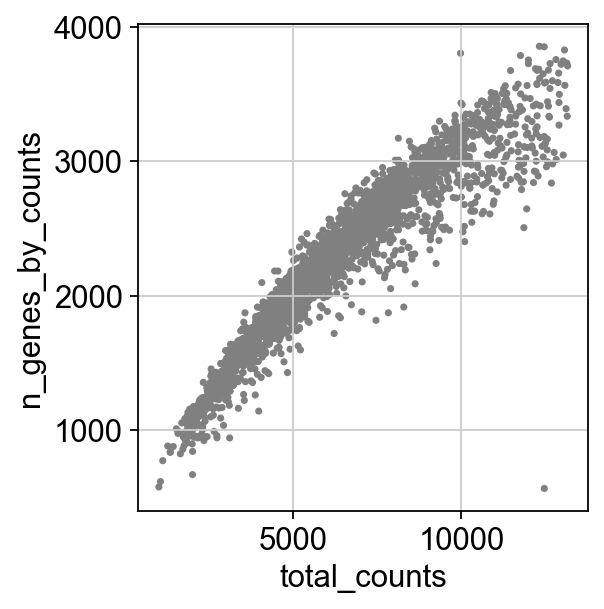

In [20]:
sc.pl.scatter(e125, x='total_counts', y='n_genes_by_counts')

In [21]:
sc.pp.calculate_qc_metrics(e125, qc_vars=['ribo', 'mt'], percent_top=None, log1p=False, inplace=True)

In [22]:
e125 = e125[e125.obs['n_genes_by_counts'] > 500, :]

# Remove genes we don't care about (ribo, malat, mito) and are expressed in less than 5 cells

In [23]:
sc.pp.filter_genes(e125, min_cells=5)


print("Number of cells: ",e125.n_obs)

#save a copy of anndata before normalization 
e125 = e125.copy()

##remove MT, ribo, and maltat reads since these reads are highly abundant, but not relevant to expirement
mito_genes = e125.var_names.str.startswith("mt-")
ribo_genes = e125.var_names.str.startswith(("Rps","Rpl"))
malat_gene = e125.var_names.str.startswith("Malat1")

remove = np.add(mito_genes, ribo_genes)
remove = np.add(remove, malat_gene)
keep = np.invert(remove)

print(len(remove))

print(np.count_nonzero(keep))
print(len(keep) - np.count_nonzero(keep))

e125 = e125[:,keep].copy()

print("Number of genes: ",e125.n_vars)

Number of cells:  2906
14512
14404
108
Number of genes:  14404


# SCN using Qin's data to train

Load in Qin's data

In [24]:
adTrain = sc.read_h5ad("C:/Users/yeaji/OneDrive - Johns Hopkins/PC.project/1. Cartilage devp/data/scRNA/Qin_data/adJointDev_ALL_032322v2.h5ad")

In [25]:
adTrain.var_names_make_unique()

In [26]:
qDat = e125.copy()
qDat.var_names_make_unique()

In [27]:
genesTrain = adTrain.var_names
genesQuery = qDat.var_names
cgenes = genesTrain.intersection(genesQuery)
print(len(cgenes))

adTrain1 = adTrain[:,cgenes]
adQuery = qDat[:,cgenes].copy()
adTrain1 = adTrain1[~adTrain1.obs.index.duplicated()]

14404


In [28]:
qDat.obs

,timepoint,ann1,level1,level2,level3,topLevel,batch,n_genes_by_counts,total_counts,total_counts_ribo,pct_counts_ribo,total_counts_mt,pct_counts_mt
qb_E12-5_gdf:AAACCTGAGGCGTACAx-0-0-0,e12.5,joint,SC1,SC1_A,SC1_A1,GLE,0,2130,5934.0,2072.0,34.917427,54.0,0.910010
qb_E12-5_gdf:AAACCTGCACTGCCAGx-0-0-0,e12.5,cycling,SC1,SC1_A,SC1_A4,GLE,0,2609,7305.0,1802.0,24.668036,66.0,0.903491
qb_E12-5_gdf:AAACCTGGTGAGTGACx-0-0-0,e12.5,joint,SC1,SC1_A,SC1_A1,GLE,0,1094,2010.0,543.0,27.014927,15.0,0.746269
qb_E12-5_gdf:AAACCTGGTTGCCTCTx-0-0-0,e12.5,cycling,SC1,SC1_A,SC1_A4,GLE,0,2702,7125.0,1612.0,22.624561,72.0,1.010526
qb_E12-5_gdf:AAACCTGTCGAGAACGx-0-0-0,e12.5,joint,SC1,SC1_B,SC1_B4,GLE,0,1406,2604.0,501.0,19.239632,50.0,1.920123
...,...,...,...,...,...,...,...,...,...,...,...,...,...
qb_E12-5_gdf:TTGCGTCAGTCTCCTCx-0-0-1,e12.5,myocyte,myocyte,myocyte,myocyte,non-GLE,1,3071,11692.0,4566.0,39.052345,142.0,1.214506
qb_E12-5_gdf:TTGCGTCCAAAGGTGCx-0-0-1,e12.5,myocyte,myocyte,myocyte,myocyte,non-GLE,1,3409,11750.0,3830.0,32.595745,92.0,0.782979
qb_E12-5_gdf:TTGGCAAAGTAGCGGTx-0-0-1,e12.5,myocyte,myocyte,myocyte,myocyte,non-GLE,1,2797,10921.0,3759.0,34.419926,140.0,1.281934
qb_E12-5_gdf:TTTCCTCGTAAACCTCx-0-0-1,e12.5,endothelial,endothelial,endothelial,endothelial,non-GLE,1,2848,9626.0,2450.0,25.451902,63.0,0.654477


In [29]:
qDat.var

,Accession,Chromosome,End,Start,Strand,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
Sox17,ENSMUSG00000025902,1,4497354,4490931,-,False,False,9,0.010323,99.690296,30.0,9
Mrpl15,ENSMUSG00000033845,1,4785739,4773206,-,False,False,418,0.157261,85.615967,457.0,418
4732440D04Rik,ENSMUSG00000090031,1,6215293,6209866,-,False,False,18,0.006194,99.380592,18.0,18
Gm26901,ENSMUSG00000097797,1,7397869,7349406,-,False,False,6,0.002065,99.793531,6.0,6
Mybl1,ENSMUSG00000025912,1,9700209,9667415,-,False,False,27,0.009635,99.070888,28.0,27
...,...,...,...,...,...,...,...,...,...,...,...,...
Ddx3y,ENSMUSG00000069045,Y,1286629,1260771,-,False,False,1314,0.667240,54.783207,1939.0,1314
Kdm5d,ENSMUSG00000056673,Y,956786,897788,+,False,False,67,0.023744,97.694425,69.0,67
Eif2s3y,ENSMUSG00000069049,Y,1028847,1010543,+,False,False,913,0.384033,68.582244,1116.0,913
Gm29650,ENSMUSG00000099876,Y,1049134,1048393,+,False,False,30,0.010668,98.967653,31.0,30


# Split training data into two to check classifer later

In [30]:
expTrain, expVal = pySCN.splitCommonAnnData(adTrain1, ncells=200,dLevel="level2")

SC3_A : 
2451
dermis : 
964
8 (prog) : 
123
0 : 
22
6 (stro) : 
134
ncc : 
78
SC1_A : 
1791
SC1_B : 
895
4 : 
209
SC2_A : 
627
2 : 
354
SC3_B : 
1070
blood : 
286
melanocyte : 
15
9 (divi) : 
141
3 (line) : 
49
3 : 
251
8 : 
25
5 (stro) : 
633
1 (chon) : 
90
7 : 
48
2 (liga) : 
54
7 (prog) : 
51
myocyte : 
1128
4 (synfib) : 
26
erythro : 
6
endothelial : 
23
SC2_B : 
495
6 : 
52
5 : 
5


# Train the classifer

In [31]:
[cgenesA, xpairs, tspRF] = pySCN.scn_train(expTrain, nTopGenes = 100, nRand = 100, nTrees = 1000, nTopGenePairs = 100, dLevel = "level2", stratify=True, limitToHVG=True)

HVG
Matrix normalized
There are  1609  classification genes

0
1 (chon)
2
2 (liga)
3
3 (line)
4
4 (synfib)
5
5 (stro)
6
6 (stro)
7
7 (prog)
8
8 (prog)
9 (divi)
SC1_A
SC1_B
SC2_A
SC2_B
SC3_A
SC3_B
blood
dermis
endothelial
erythro
melanocyte
myocyte
ncc
There are 2868 top gene pairs

Finished pair transforming the data



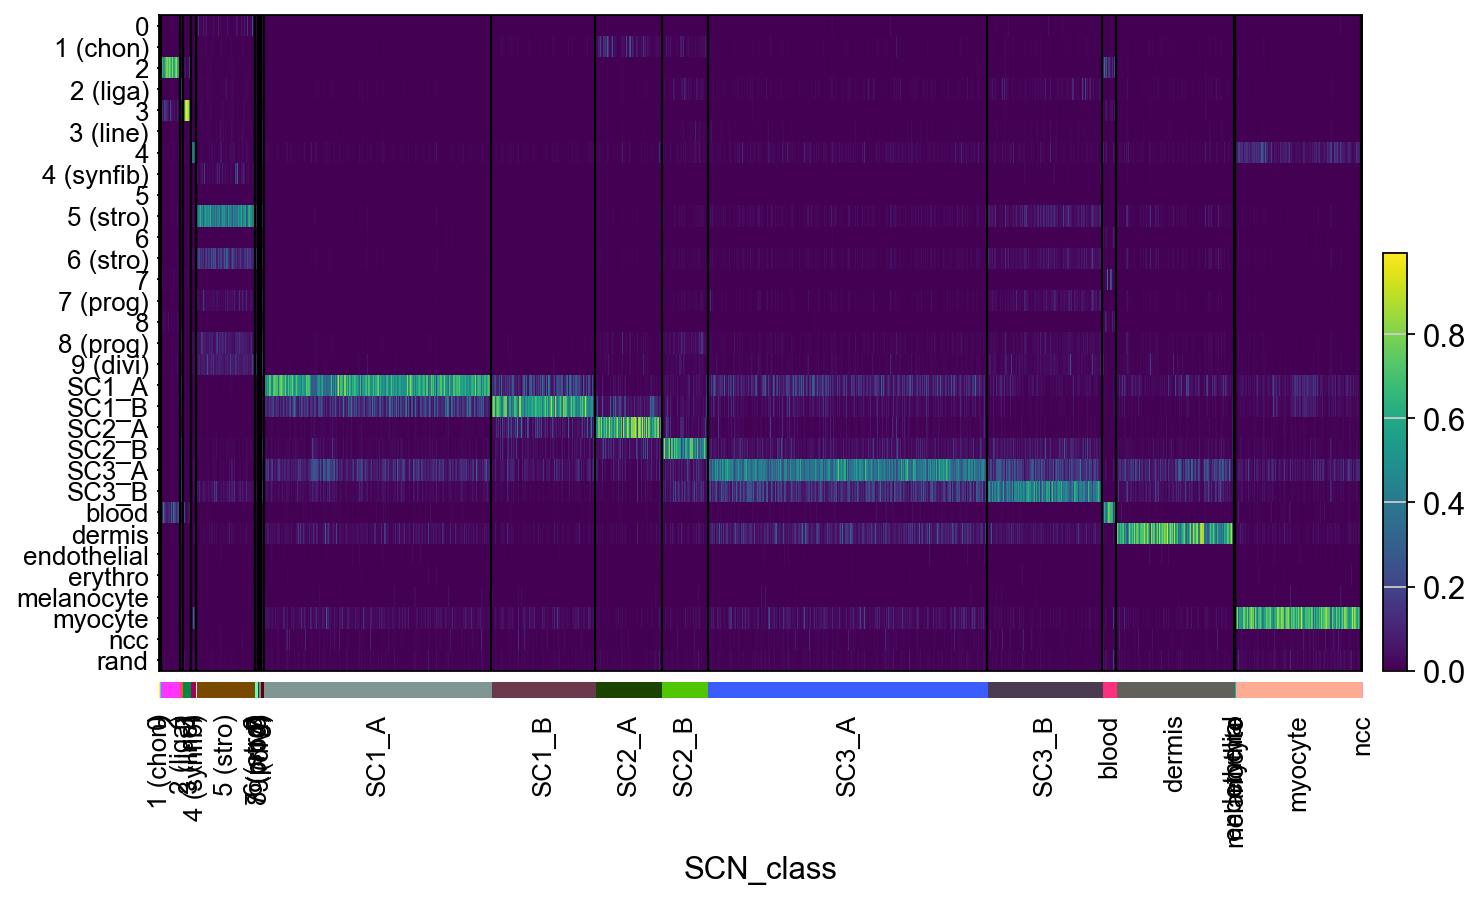

In [32]:
adVal = pySCN.scn_classify(expVal, cgenesA, xpairs, tspRF, nrand = 0)

ax = sc.pl.heatmap(adVal, adVal.var_names.values, groupby='SCN_class', cmap='viridis', dendrogram=False, swap_axes=True)

In [33]:
adQd5 = pySCN.scn_classify(adQuery, cgenesA, xpairs, tspRF, nrand = 0)

In [34]:
adQuery.obs = pd.concat([adQuery.obs, adQd5.obs['SCN_class']], axis=1)

# count normalization

In [35]:
e125 = adQuery.copy()

In [36]:
e125.write_h5ad("C:/Users/yeaji/OneDrive - Johns Hopkins/PC.project/1. Cartilage devp/data/scRNA/Qin_data/Analysis/e12.5/e125_SCN.h5ad")

In [37]:
adata = sc.read_h5ad("C:/Users/yeaji/OneDrive - Johns Hopkins/PC.project/1. Cartilage devp/data/scRNA/Qin_data/Analysis/e12.5/e125_SCN.h5ad")

In [38]:
adata.raw = adata
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [39]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=4, min_disp=0.25)

In [40]:
sc.pp.scale(adata, max_value=10)

# PCA

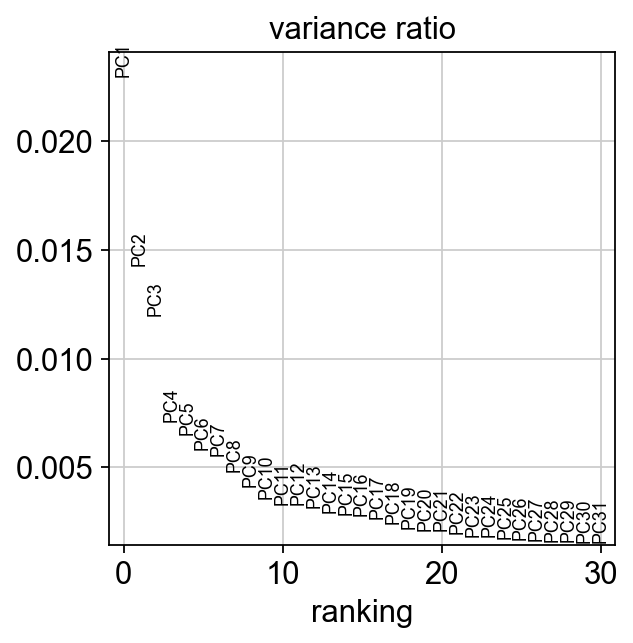

In [41]:
sc.tl.pca(adata, svd_solver='arpack', use_highly_variable=True)
sc.pl.pca_variance_ratio(adata)

# fine neighbors

In [43]:
sc.pp.neighbors(adata)
sc.tl.leiden(adata, resolution =.3)
sc.tl.umap(adata, .25)

In [44]:
adata.obs

,timepoint,ann1,level1,level2,level3,topLevel,batch,n_genes_by_counts,total_counts,total_counts_ribo,pct_counts_ribo,total_counts_mt,pct_counts_mt,SCN_class,leiden
qb_E12-5_gdf:AAACCTGAGGCGTACAx-0-0-0,e12.5,joint,SC1,SC1_A,SC1_A1,GLE,0,2130,5934.0,2072.0,34.917427,54.0,0.910010,SC1_A,0
qb_E12-5_gdf:AAACCTGCACTGCCAGx-0-0-0,e12.5,cycling,SC1,SC1_A,SC1_A4,GLE,0,2609,7305.0,1802.0,24.668036,66.0,0.903491,SC1_B,2
qb_E12-5_gdf:AAACCTGGTGAGTGACx-0-0-0,e12.5,joint,SC1,SC1_A,SC1_A1,GLE,0,1094,2010.0,543.0,27.014927,15.0,0.746269,SC1_A,0
qb_E12-5_gdf:AAACCTGGTTGCCTCTx-0-0-0,e12.5,cycling,SC1,SC1_A,SC1_A4,GLE,0,2702,7125.0,1612.0,22.624561,72.0,1.010526,SC1_A,2
qb_E12-5_gdf:AAACCTGTCGAGAACGx-0-0-0,e12.5,joint,SC1,SC1_B,SC1_B4,GLE,0,1406,2604.0,501.0,19.239632,50.0,1.920123,SC1_B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
qb_E12-5_gdf:TTGCGTCAGTCTCCTCx-0-0-1,e12.5,myocyte,myocyte,myocyte,myocyte,non-GLE,1,3071,11692.0,4566.0,39.052345,142.0,1.214506,myocyte,3
qb_E12-5_gdf:TTGCGTCCAAAGGTGCx-0-0-1,e12.5,myocyte,myocyte,myocyte,myocyte,non-GLE,1,3409,11750.0,3830.0,32.595745,92.0,0.782979,myocyte,3
qb_E12-5_gdf:TTGGCAAAGTAGCGGTx-0-0-1,e12.5,myocyte,myocyte,myocyte,myocyte,non-GLE,1,2797,10921.0,3759.0,34.419926,140.0,1.281934,myocyte,3
qb_E12-5_gdf:TTTCCTCGTAAACCTCx-0-0-1,e12.5,endothelial,endothelial,endothelial,endothelial,non-GLE,1,2848,9626.0,2450.0,25.451902,63.0,0.654477,endothelial,4


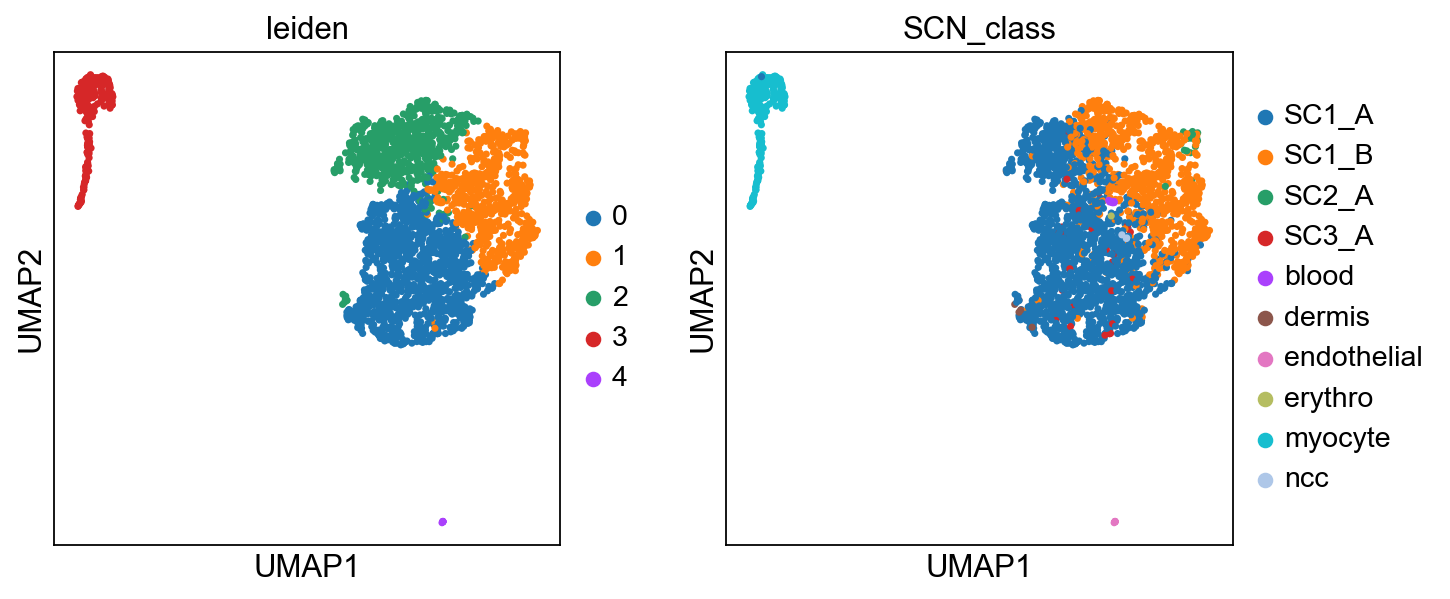

In [45]:
sc.pl.umap(adata, color=['leiden', 'SCN_class'], palette=sc.pl.palettes.default_20, )


In [46]:
adata.var_names

Index(['Sox17', 'Mrpl15', '4732440D04Rik', 'Gm26901', 'Mybl1', 'Vcpip1',
       'Snhg6', 'Tcf24', 'Cops5', 'Arfgef1',
       ...
       'Trappc2', 'Arhgap6', 'Mid1', 'Gm21887', 'Uty', 'Ddx3y', 'Kdm5d',
       'Eif2s3y', 'Gm29650', 'Gm47283'],
      dtype='object', length=14404)

In [48]:
sc.tl.rank_genes_groups(adata,'level3', use_raw=False)
sc.pl.rank_genes_groups_dotplot(adata, n_genes=50, groupby='level3', use_raw=False, dendrogram=False)


ValueError: Could not calculate statistics for groups erythro, SC3_A1, SC3_A4, SC2_A3 since they only contain one sample.

In [49]:
adata.obs["level3"].value_counts()

SC1_A1         1009
SC1_A4          416
SC1_A2          289
SC1_B5          258
myocyte         251
SC1_B4          213
SC1_B3          176
SC1_B1          129
SC1_B2          101
SC1_A3           36
blood             8
endothelial       8
dermis            3
ncc               3
SC2_A1            2
SC3_A4            1
SC3_A1            1
erythro           1
SC2_A3            1
Name: level3, dtype: int64

In [53]:
adata = adata[~(adata.obs["level3"] == "SC2_A1")]
adata = adata[~(adata.obs["level3"] == "SC3_A4")]
adata = adata[~(adata.obs["level3"] == "SC3_A1")]
adata = adata[~(adata.obs["level3"] == "SC2_A3")]
adata = adata[~(adata.obs["level3"] == "erythro")]
adata.obs["level3"].value_counts()

SC1_A1         1009
SC1_A4          416
SC1_A2          289
SC1_B5          258
myocyte         251
SC1_B4          213
SC1_B3          176
SC1_B1          129
SC1_B2          101
SC1_A3           36
blood             8
endothelial       8
dermis            3
ncc               3
Name: level3, dtype: int64

In [54]:
# 클러스터링 결과로 rank_genes_groups를 실행
sc.tl.rank_genes_groups(adata, 'level3', use_raw=False)

# 상위 순위 유전자 목록 추출
top_genes_per_cluster = adata.uns['rank_genes_groups']['names']

# 데이터프레임 생성
gene_df = pd.DataFrame(top_genes_per_cluster)

# 상위 50개 유전자만 선택
gene_df = gene_df.iloc[:, :100]

# 데이터프레임을 엑셀 파일로 저장
gene_df.to_excel('C:/Users/yeaji/OneDrive - Johns Hopkins/PC.project/1. Cartilage devp/data/scRNA/Qin_data/Analysis/e12.5/excel/SCN_cluster/e125_SCN_cluster_rank_genes_level3.xlsx', index=False)